<a href="https://colab.research.google.com/github/reginaspatium/ecommerce-sales-analysis-python/blob/main/Global_E_Commerce_Sales_Analysis_(2010%E2%80%932017).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Підключення до Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Шлях до файлу
%cd "/content/drive/MyDrive/Mate academy/Python/Python for DA Module Task"

# Читання csv файлу
countries = pd.read_csv("countries.csv")
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")

Mounted at /content/drive
/content/drive/MyDrive/Mate academy/Python/Python for DA Module Task


#**Data overview**

####**Опис таблиці Countries**
1. **Кількість рядків:** 249
2. **Кількість колонок:** 5
3. **Опис колонок:**

**`name`** (тип даних: object) — повна назва країни.

**`alpha-2`** (тип даних: object) — дволітерний код країни.

**`alpha-3`** (тип даних: object) — трилітерний код країни, використовується для зв’язку з таблицею подій.

**`region`** (тип даних: object) — регіон, до якого належить країна.

**`sub-region`** (тип даних: object) — підрегіон у межах регіону.

4. **Ключові поля для об’єднання з іншими таблицями:** alpha-3 & Country Code (з таблицею Events).

5. **Можливі проблеми / пропуски / особливості даних:** alpha-2, region та sub-region мають по одному пропуску, типи даних вірні.

6. **Короткий висновок про таблицю:** таблиця містить інформацію про країни, їх коди та регіони.

In [ ]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


####**Опис таблиці Events**
1. **Кількість рядків:** 1330
2. **Кількість колонок:** 10
3. **Опис колонок:**

**`Order ID`** (тип даних: int64) — унікальний ідентифікатор замовлення.

**`Order Date`** (тип даних: object) — дата оформлення замовлення.

**`Ship Date`** (тип даних: object) — дата відправки замовлення.

**`Order Priority`** (тип даних: object) — пріоритет замовлення.

**`Country Code`** (тип даних: object) — код країни, зв’язок з таблицею Countries через alpha-3.

**`Product ID`** (тип даних: int64) — ідентифікатор продукту, зв’язок з таблицею Products через id.

**`Sales Channel`** (тип даних: object) — канал продажу *(Online / Offline)*.

**`Units Sold`** (тип даних: float64) — кількість проданих одиниць товару.

**`Unit Price`** (тип даних: float64) — ціна за одиницю товару.

**`Unit Cost`** (тип даних: float64) — собівартість одиниці товару.

4. **Ключові поля для об’єднання з іншими таблицями:**

*   Country Code & alpha-3 (з таблицею Countries);
*   Product ID & id (з таблицею Products).

5. **Можливі проблеми / пропуски / особливості даних:**

*   Country Code — 82 пропуски;
*   Units Sold — 2 пропуски;
*   типи даних дат (Order Date, Ship Date) наразі object, треба перетворити на datetime.

6. **Короткий висновок про таблицю:** таблиця містить дані про замовлення – інформацію про продукти, країни, дати замовлень, вартість та канали продажу.
Вона є основною таблицею для об’єднання з таблицями Products і Countries.

In [ ]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


####**Опис таблиці Products**
1. **Кількість рядків:** 12
2. **Кількість колонок:** 2
3. **Опис колонок:**

**`id`** (тип даних: int64) — унікальний ідентифікатор продукту (звʼязок з таблицею Events через Product ID).

**`item_type`** (тип даних: object) — категорія товару.

4. **Ключові поля для об’єднання з іншими таблицями:** id & Product ID (з таблицею Events).

5. **Можливі проблеми / пропуски / особливості даних:** пропуски відсутні, типи даних вірні.

6. **Короткий висновок про таблицю:** таблиця містить інформацію про продукти та їх категорії. Має зв’язок з таблицею Events через Product ID.

In [ ]:
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


#**Data cleaning**
##**Missing Values**

####**Пропущені значення в таблиці Countries**
Таблиця **Countries має 3 пропуски**:

*   колонка **`alpha-2`** — 1 пропуск *(0.4% від усіх рядків);*
*   колонка **`region`** — 1 пропуск *(0.4% від усіх рядків);*
*   колонка **`sub-region`** — 1 пропуск *(0.4% від усіх рядків).*

Колонки name та alpha-3 пропусків не мають.

Пропущені значення **зустрічаються у двох країнах**:

*   Antarctica — відсутні дані для region та sub-region;
*   Namibia — відсутній код alpha-2.

**Можливі причини:** відсутність регіональної інформації для Антарктиди та відсутній дволітерний код країни Намібія.

Пропуски залишаю, бо їхня кількість дуже мала і з ними можна працювати під час аналізу.

**Жоден з цих пропусків не пов’язаний із колонкою-ключем**, тому вони не вплинуть на об’єднання таблиць.

In [ ]:
isna_sum = countries.isna().sum()

isna_percent = countries.isna().sum() / len(countries) * 100

print(isna_sum)
print(f"\n{isna_percent}")

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
missing_rows = countries[countries.isna().any(axis=1)]
print(missing_rows)

           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


####**Пропущені значення в таблиці Events**
Таблиця **Events має 82 пропуски**:
*   колонка **`Country Code`** — 82 пропуски *(6.16% від усіх рядків);*
*   колонка **`Units Sold`** — 2 пропуски *(0.15% від усіх рядків).*

Всі інші колонки пропусків не мають.

**Можливі причини:** відсутність Country Code може бути пов’язана з некоректним або неповним записом інформації про країну для частини замовлень.

Пропуски в Units Sold можуть виникати через помилки збору даних або незавершені транзакції.

Пропуски в Country Code важливі для аналізу за країнами / регіонами — такі записи до географічного аналізу включати не потрібно. Відновити їх неможливо, оскільки в таблиці відсутні інші значення, які змогли б надати інформацію щодо країни замовлення.

Пропуски в Units Sold через малу кількість не впливають суттєво на загальні результати.

На етапі первинного аналізу пропуски не видаляю.

In [ ]:
isna_sum = events.isna().sum()
isna_percent = events.isna().sum() / len(events) * 100

print(isna_sum)
print(f"\n{isna_percent}")

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


####**Пропущені значення в таблиці Products**
**Таблиця Products не має пропусків** — всі 12 записів заповнені, тому додаткове очищення не потрібне.

In [ ]:
isna_sum = products.isna().sum()
isna_percent = products.isna().sum() / len(products)

print(isna_sum)
print(f"\n{isna_percent}")

id           0
item_type    0
dtype: int64

id           0.0
item_type    0.0
dtype: float64


#**Data cleaning**
##**Quality Checks**

####**Таблиця Countries**
1. **Типи даних** - вірні.

2. **Дублікати** -  нема.


3. **Некоректні дані**:

У колонці **`alpha-2`** є один пропуск у рядку Namibia, через що код не відповідає стандарту 2 символів.

**Інші коди alpha-2 і всі alpha-3 мають правильну довжину.**

In [ ]:
duplicates = countries.duplicated()
duplicates_sum = countries.duplicated().sum()
print(f"Duplicates: {duplicates_sum}")

Duplicates: 0


In [ ]:
check_alpha_2 = countries[countries["alpha-2"].str.len() !=2]
check_alpha_3 = countries[countries["alpha-3"].str.len() !=3]

print(check_alpha_2)
print(f"\n{check_alpha_3}")

        name alpha-2 alpha-3  region          sub-region
153  Namibia     NaN     NAM  Africa  Sub-Saharan Africa

Empty DataFrame
Columns: [name, alpha-2, alpha-3, region, sub-region]
Index: []


In [ ]:
# Видалення зайвих пробілів
countries["alpha-3"] = countries["alpha-3"].str.strip()

####**Таблиця Events**

1. **Типи даних** - виправила колонки **`Order Date`** та **`Ship Date`** на тип datetime64.

2. **Дублікати** - нема.

3. **Аномалії**:
*   **`Order ID`** та **`Product ID`** — нормальні, ніяких аномалій;
*   **`Units Sold`**, **`Unit Price`**, **`Unit Cost`** — є великі значення, які можуть бути викидами або оптовими / дорогими продажами.

**Перевірка аномалій у числових колонках**

**`Units Sold`** — 131 рядок зі значенням > 9000

**`Unit Price`** — 220 рядків зі значенням > 600

**`Unit Cost`** — 220 рядків зі значенням > 500

Високі значення підтягують середнє, тому воно відрізняється від медіани. Ймовірно, це реальні оптові або дорогі продажі. Залишаю їх, але при аналізі слід враховувати потенційний вплив викидів.

4. **Перевірка дат** — усі значення колонок **`Order Date`** та **`Ship Date`** коректні, Ship Date не раніше Order Date.
5. **Перевірка зайвих пробілів:**
*   **`Order Priority`** має зайві пробіли у 3 рядках - **випралавлено**.
6. **Перевірка регістру:**
*   **`Sales Channel:`** 3 унікальних значень, 2 якщо ігнорувати регістр - **випралавлено**.





In [ ]:
# Виправлення типу даних
events["Order Date"] = pd.to_datetime(events["Order Date"], format="%m/%d/%Y")
events["Ship Date"] = pd.to_datetime(events["Ship Date"], format="%m/%d/%Y")

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [ ]:
# Перевірка дублікатів
duplicates = events.duplicated()
duplicates_sum = events.duplicated().sum()
print(f"Duplicates: {duplicates_sum}")

Duplicates: 0


In [ ]:
# Виявлення аномальних значень по всім числовим колонкам
numeric_cols = events.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    print(f"Column: {col}")
    print(f"  Minimum: {events[col].min()}")
    print(f"  Maximum: {events[col].max()}")
    print(f"  Average: {events[col].mean()}")
    print(f"  Median: {events[col].median()}")
    print("-"*40)

Column: Order ID
  Minimum: 100640618
  Maximum: 999879729
  Average: 541204760.2428571
  Median: 538716375.5
----------------------------------------
Column: Product ID
  Minimum: 1270
  Maximum: 8969
  Average: 5788.096240601504
  Median: 5988.0
----------------------------------------
Column: Units Sold
  Minimum: 2.0
  Maximum: 9999.0
  Average: 4952.201807228916
  Median: 4962.0
----------------------------------------
Column: Unit Price
  Minimum: 9.33
  Maximum: 668.27
  Average: 264.89354135338345
  Median: 154.06
----------------------------------------
Column: Unit Cost
  Minimum: 6.92
  Maximum: 524.96
  Average: 187.2468120300752
  Median: 97.44
----------------------------------------


In [ ]:
# Виявлення кількості значень, що близькі до максимуму колонки

# Кількість рядків з Units Sold > 9000
num_units_sold_outliers = (events['Units Sold'] > 9000).sum()
print(f"Number of rows with Units Sold > 9000: {num_units_sold_outliers}")

# Кількість рядків з Unit Price > 600
num_unit_price_outliers = (events['Unit Price'] > 600).sum()
print(f"\nNumber of rows with Unit Price > 600: {num_unit_price_outliers}")

# Кількість рядків з Unit Cost > 500
num_unit_cost_outliers = (events['Unit Cost'] > 500).sum()
print(f"\nNumber of rows with Unit Cost > 500: {num_unit_cost_outliers}")

Number of rows with Units Sold > 9000: 131

Number of rows with Unit Price > 600: 220

Number of rows with Unit Cost > 500: 220


In [ ]:
# Перевірка даних в колонках дат
if (events["Ship Date"] < events["Order Date"]).any():
  print(f"There are rows where Ship Date < Order Date")
else:
  print(f"All dates are correct")

All dates are correct


In [ ]:
# Перевірка на зайві пробіли
text_cols_events = events.select_dtypes(include="object")

for col in text_cols_events:
    has_spaces = events[col].str.startswith(" ") | events[col].str.endswith(" ")
    print(f"{col} має зайві пробіли у {has_spaces.sum()} рядках")

events["Order Priority"] = events["Order Priority"].str.strip()

Order Priority має зайві пробіли у 3 рядках
Country Code має зайві пробіли у 0 рядках
Sales Channel має зайві пробіли у 0 рядках


In [ ]:
# Перевірка регістру
for col in text_cols_events:
    unique_values = events[col].nunique()
    unique_lower = events[col].str.lower().nunique()
    print(f"{col}: {unique_values} унікальних значень, {unique_lower} якщо ігнорувати регістр")

events["Sales Channel"] = events["Sales Channel"].str.title()

Order Priority: 4 унікальних значень, 4 якщо ігнорувати регістр
Country Code: 45 унікальних значень, 45 якщо ігнорувати регістр
Sales Channel: 3 унікальних значень, 2 якщо ігнорувати регістр


####**Таблиця Products**
1. **Типи даних** — вірні.

2. **Дублікати** — відсутні.

3. **Пропущені значення** — відсутні.

4. **Текстові колонки:**

*   **`item_type`** — зайвих пробілів немає, регістр вірний.

Таблиця чиста, всі дані коректні.

In [ ]:
# Перевірка дублікатів
duplicates = products.duplicated()
duplicates_sum = products.duplicated().sum()

print(f"Duplicates: {duplicates_sum}")

Duplicates: 0


In [ ]:
# Перевірка зайвих пробілів
text_cols_products = products.select_dtypes(include="object")

for col in text_cols_products:
  has_spaces = products[col].str.startswith(" ") | products[col].str.endswith(" ")
  print((f"{col} має зайві пробіли у {has_spaces.sum()} рядках"))

item_type має зайві пробіли у 0 рядках


In [ ]:
# Перевірка регістру
for col in text_cols_products:
  unique_values = products[col].nunique()
  unique_lower = products[col].str.lower().nunique()
  print(f"{col}: {unique_values} унікальних значень, {unique_lower} якщо ігнорувати регістр")

item_type: 12 унікальних значень, 12 якщо ігнорувати регістр


#**Data analysis and visualization**

In [ ]:
# Left Join три таблиці в одну
df = pd.merge(events, products, how="left", left_on="Product ID", right_on="id") \
            .merge(countries, how="left", left_on="Country Code", right_on="alpha-3")

df.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [ ]:
# Видалення зайвих колонок
df = df.drop(columns=["id", "alpha-2", "alpha-3"])

In [ ]:
# Зміна назв колонок
df = df.rename(columns={
    "item_type": "Product Category",
    "name": "Country",
    "sub-region": "Subregion",
    "region": "Region"
})

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Product Category,Country,Region,Subregion
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


####**Ключові метрики діяльності компанії**

1. **Загальна кількість замовлень** — 1330.

2. **Загальний дохід** — 1,702,129,408.21.

3. **Загальні витрати** — 1,200,694,949.21.

4. **Загальний прибуток** — 501,434,459.00.

5. **Кількість охоплених країн** — 45.

6. **Кількість категорій** — 12.

7. **Середній прибуток на замовлення** — 377,586.19.

8. **Найпопулярніші товари за кількістю продажів**:
*   Personal Care
*   Office Supplies
*   Clothes
*   Household
*   Baby Food


In [ ]:
# Загальна кількість замовлень
print(f"Total number of orders: {len(df["Order ID"])}")

# Загальний дохід
total_income_per_order = df["Units Sold"] * df["Unit Price"]
print(f"\nTotal income: {total_income_per_order.sum():,.2f}")

# Загальні витрати
total_costs_per_order = df["Units Sold"] * df["Unit Cost"]
print(f"\nTotal cost: {total_costs_per_order.sum():,.2f}")

# Загальний прибуток
total_profit = total_income_per_order.sum() - total_costs_per_order.sum()
print(f"\nTotal profit: {total_profit:,.2f}")

# Кількість охоплених країн
countries_count = df["Country"].nunique()
print(f"\nNumber of countries covered: {countries_count}")

# Кількість категорій
print(f"\nNumber of categories: {df["Product Category"].nunique()}")

# Середній прибуток на замовлення
profit_per_order = df["Units Sold"] * df["Unit Price"] - df["Units Sold"] * df["Unit Cost"]
avg_profit = profit_per_order.mean()
print(f"\nAverage profit per order: {avg_profit:,.2f}")

# Найпопулярніші товари за кількістю продажів
top_5_products = df.sort_values(by="Units Sold", ascending=False).head(5)
print("\nTop-5 products by sales volume:")
print(top_5_products[["Product Category", "Units Sold"]])

Total number of orders: 1330

Total income: 1,702,129,408.21

Total cost: 1,200,694,949.21

Total profit: 501,434,459.00

Number of countries covered: 45

Number of categories: 12

Average profit per order: 377,586.19

Top-5 products by sales volume:
     Product Category  Units Sold
424     Personal Care      9999.0
1033  Office Supplies      9997.0
242           Clothes      9996.0
1084        Household      9985.0
47          Baby Food      9968.0


##**Аналіз продажів у розрізі різних вимірів**

####**Категорії товарів**

**Найприбутковіша категорія:** Cosmetics. Попри те, що вона не є першою за обсягами продажів, її висока вартість робить її ключовою категорією.

**Високий оборот vs Прибуток:** категорія Office Supplies є лідером за популярністю та обсягом доходу. Однак вона також має великі витрати, що залишає її на другому місці за прибутком після Cosmetics.

**Низькоефективні категорії:** товари категорії Fruits має найнижчі показники прибутку, попри те, що вони займають середні позиції за популярністю.


In [ ]:
# Налаштування формату чисел
pd.options.display.float_format = '{:,.2f}'.format

# Колонки з підрахунками
df["Income"] = df["Units Sold"] * df["Unit Price"]
df["Cost"] = df["Units Sold"] * df["Unit Cost"]
df["Profit"] = df["Income"] - df["Cost"]
df["Popularity"] = df["Units Sold"]

# Зведена таблиця по категоріях за доходами
pivot_categories_money = df.pivot_table(
    index="Product Category",
    values=["Income", "Cost", "Profit"],
    aggfunc={
        "Income": "sum",
        "Cost": "sum",
        "Profit": "sum"
    }
).sort_values("Profit", ascending=False)

# Зведена таблиця по категоріях за популярністю
pivot_categories_popularity = df.pivot_table(
    index="Product Category",
    values=["Popularity"],
    aggfunc="sum"
).sort_values("Popularity", ascending=False)


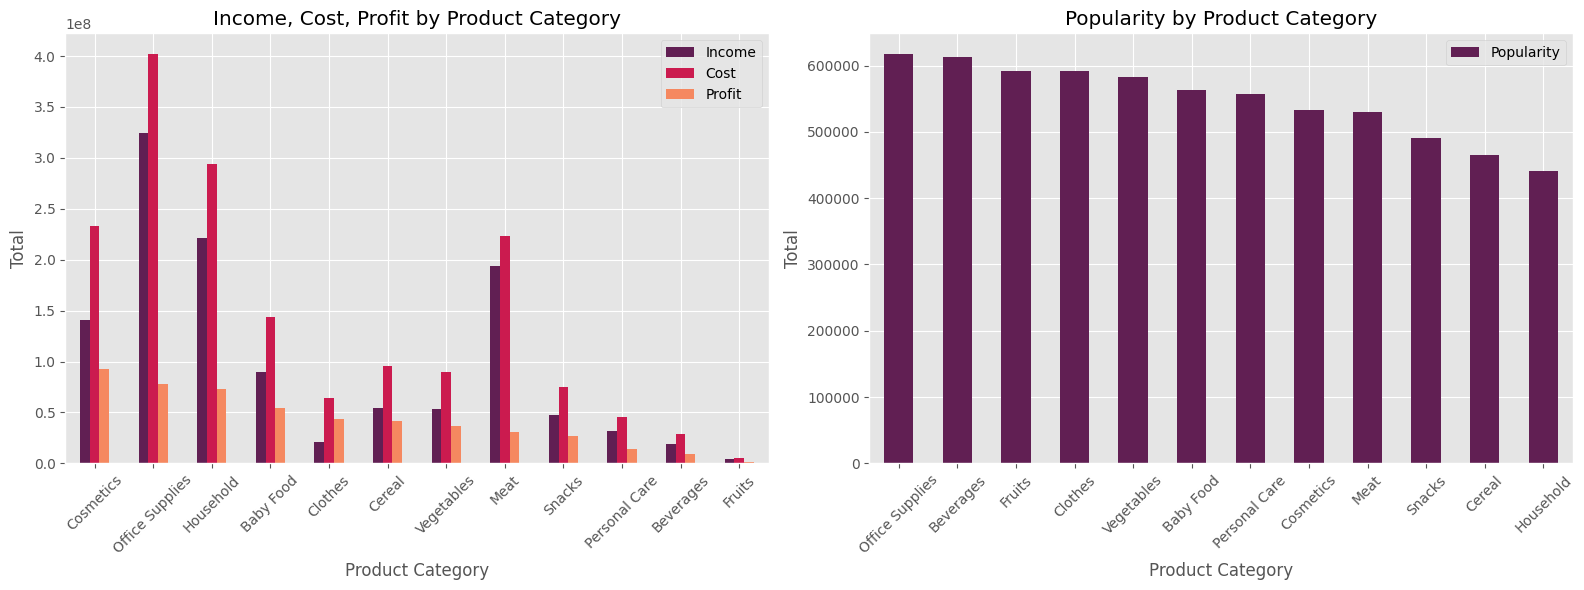

In [ ]:
# Призначення кольору
colors = sns.color_palette("rocket", 3)

# Налаштування стилю
plt.style.use("ggplot")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Створення графіка доходів за категоріями
pivot_categories_money.plot(kind="bar", color = colors, ax=ax[0])
ax[0].set_title("Income, Cost, Profit by Product Category")
ax[0].set_ylabel("Total")
ax[0].tick_params(axis='x', rotation=45, labelsize=10)
ax[0].legend(["Income", "Cost", "Profit"])

# Створення графіка популярності товарів за категоріями
pivot_categories_popularity.plot(kind="bar", color = colors, ax=ax[1])
ax[1].set_title("Popularity by Product Category")
ax[1].set_ylabel("Total")
ax[1].tick_params(axis='x', rotation=45, labelsize=10)
ax[1].legend(["Popularity"])

plt.tight_layout()
plt.show()

####**Географія (країни, регіони)**

**Лідери за прибутком:** найвищий прибуток приносять Andorra, Ukraine та Malta.

**Парадокс популярності:** країни-лідери за кількістю проданих одиниць, такі як Macedonia та San Marino, не є лідерами за прибутком. Це свідчить про те, що там продаються переважно дешеві товари або товари з низькою маржинальністю.

**Аутсайдери:** Найменші показники як за популярністю, так і за прибутком демонструє Monaco.

In [ ]:
# Зведена таблиця по країнах за прибутком
pivot_countries_money = df.pivot_table(
    index="Country",
    aggfunc={
        "Income": "sum",
        "Cost": "sum",
        "Profit": "sum"
    }
).sort_values("Profit", ascending=True)

# Зведена таблиця по країнах за популярністю
pivot_countries_popularity = df.pivot_table(
    index="Country",
    values=["Popularity"],
    aggfunc="sum"
).sort_values("Popularity", ascending=True)

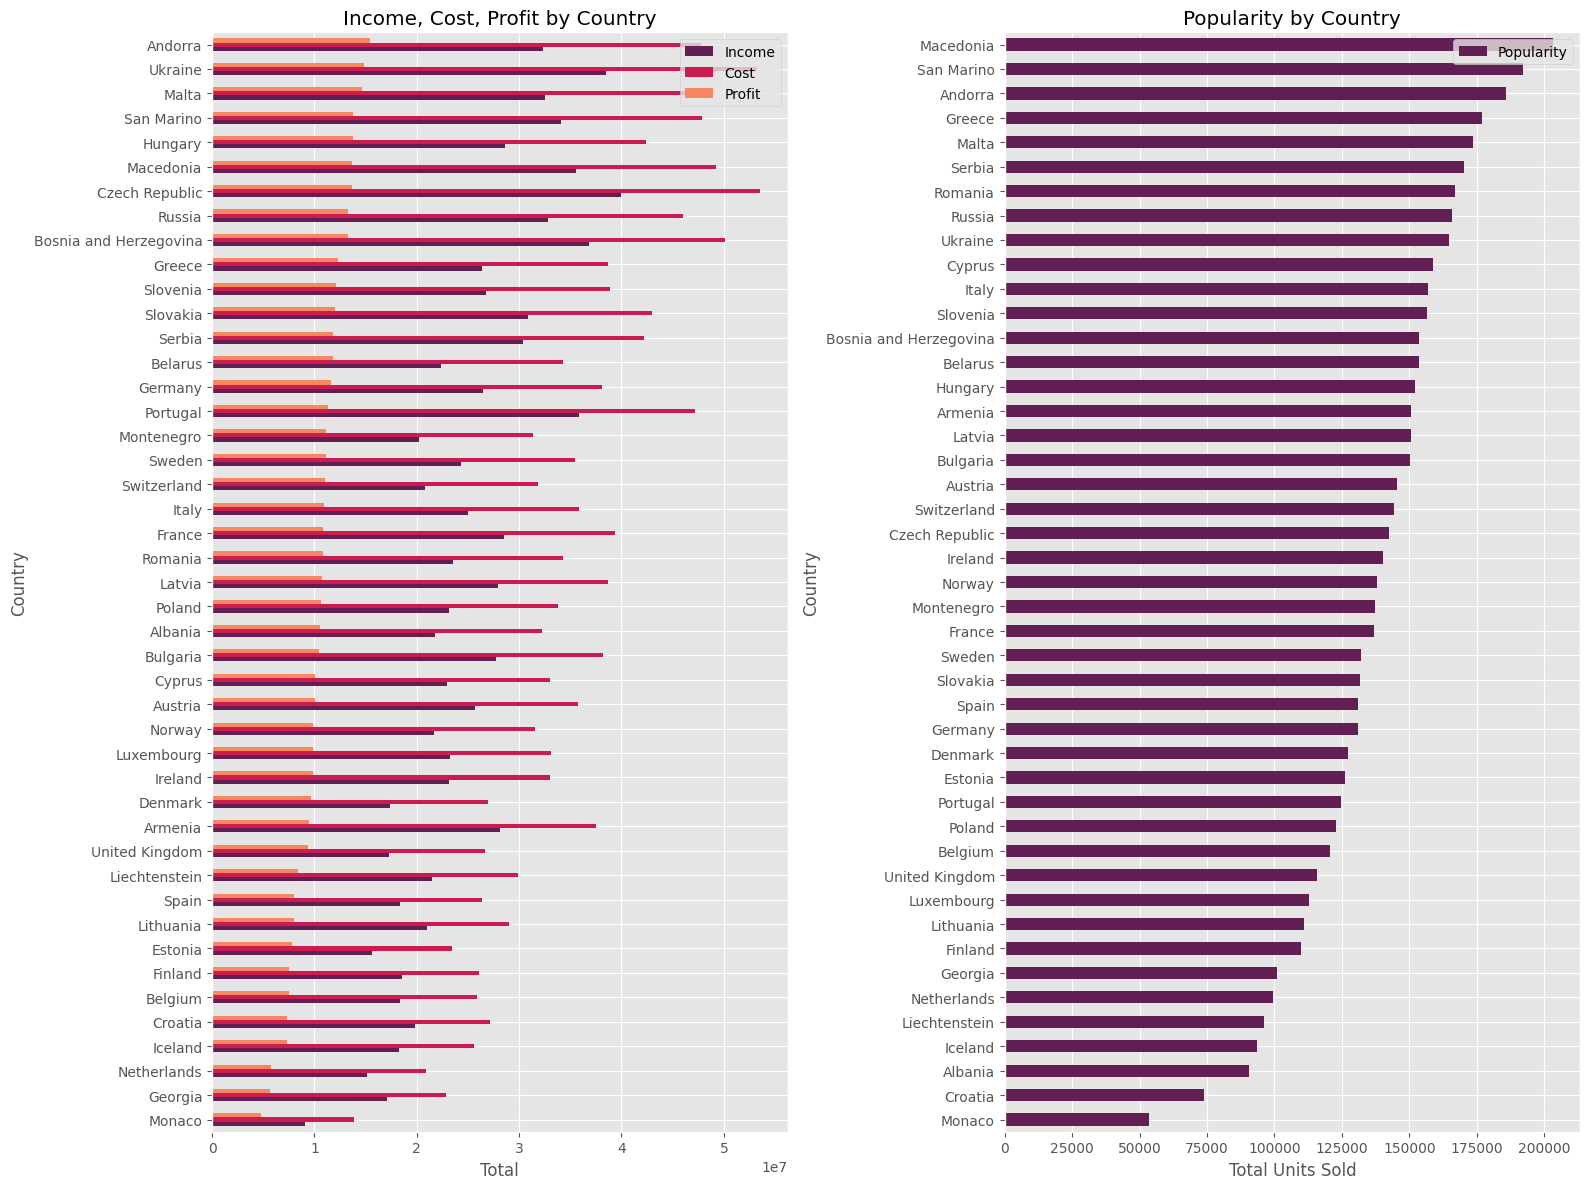

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 12))

# Створення графіка доходів за країнами
pivot_countries_money.plot(kind="barh", color= colors, ax=ax[0])
ax[0].set_title("Income, Cost, Profit by Country")
ax[0].set_xlabel("Total")
ax[0].set_ylabel("Country")
ax[0].legend(["Income", "Cost", "Profit"], loc="upper right")

# Створення графіка популярності товарів за країнами
pivot_countries_popularity.plot(kind="barh", color= colors, ax=ax[1])
ax[1].set_title("Popularity by Country")
ax[1].set_xlabel("Total Units Sold")
ax[1].set_ylabel("Country")
ax[1].legend(["Popularity"], loc="upper right")

plt.tight_layout()
plt.show()

####**Канали продажу**

**Розподіл популярності:** компанія має гарний баланс між каналами продажу. **Offline-канал незначно лідирує з часткою 50.5%, тоді як Online-канал становить 49.5% від загальної кількості проданих одиниць.**

**Фінансові показники:** обидва канали демонструють схожу структуру доходів та витрат. Проте Offline-канал приносить трохи вищий загальний дохід та чистий прибуток порівняно з онлайн-продажами.

**Рентабельність:** візуально частка прибутку відносно витрат є стабільною для обох каналів.

In [ ]:
# Зведена таблиця по каналах продажу за прибутком
pivot_channel_money = df.pivot_table(
    index="Sales Channel",
    aggfunc={
        "Income": "sum",
        "Cost": "sum",
        "Profit": "sum"
    }
).sort_values("Profit", ascending=True)

# Зведена таблиця по каналах продажу за популярністю
pivot_channel_popularity = df.pivot_table(
    index="Sales Channel",
    values=["Popularity"],
    aggfunc="sum"
).sort_values("Popularity", ascending=True)

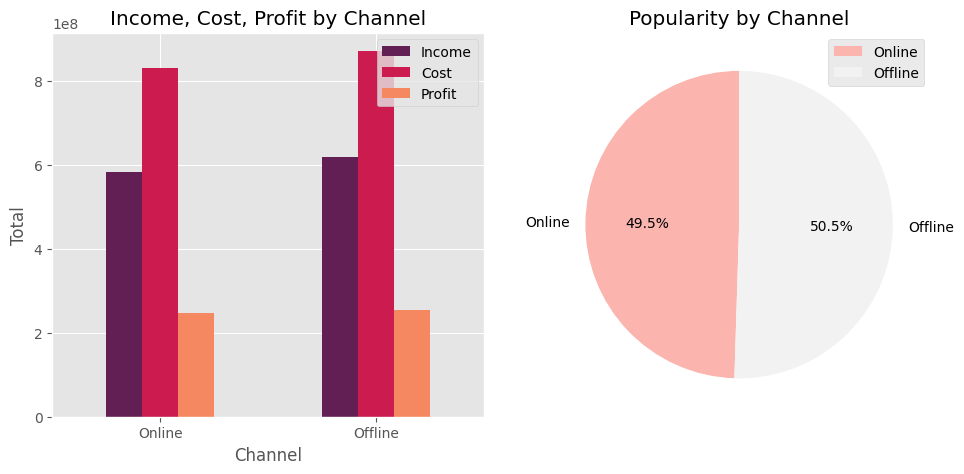

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Створення графіка доходів за каналами продажу
pivot_channel_money.plot(kind="bar", color= colors, ax=ax[0])
ax[0].set_title("Income, Cost, Profit by Channel")
ax[0].set_xlabel("Channel")
ax[0].set_ylabel("Total")
ax[0].legend(["Income", "Cost", "Profit"], loc="upper right")
ax[0].tick_params(axis='x', rotation=0)

# Створення графіка популярності товарів за каналами продажу
pivot_channel_popularity.plot(kind="pie",
                              y="Popularity",
                              cmap="Pastel1",
                              ax=ax[1],
                              autopct="%1.1f%%",
                              startangle=90)
ax[1].set_title("Popularity by Channel")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].legend(pivot_channel_popularity.index, loc="upper right")

plt.tight_layout()
plt.show()

####**Інтервал часу між замовленням та відвантаженням**

**За категоріями товарів:** середній час доставки **для всіх категорій коливається в межах 20–27 днів**.

**Найдовше** триває відвантаження категорій **Cereal та Office Supplies**, тоді як **найшвидше** обробляються замовлення на **Personal Care та Clothes**.

---

**За країнами:** спостерігається значна варіативність. **Найдовший** середній час доставки зафіксовано в **Угорщині** — **понад 30 днів**.

**Найбільш** **оперативними** є логістичні процеси в **Хорватії, Великобританії та Данії**, де середній час становить **менше 20 днів**.

---

**За регіонами:** логістика в Азії в середньому триває трохи довше (близько 26 днів), ніж у Європі (близько 25 днів). Ця **різниця є мінімальною**.

In [ ]:
# Час доставки товарів
df["Delivery Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
df[["Order Date", "Ship Date", "Delivery Time"]].head()

,Order Date,Ship Date,Delivery Time
0,2014-10-08,2014-10-18,10
1,2016-08-11,2016-08-11,0
2,2014-07-18,2014-08-11,24
3,2017-05-13,2017-06-13,31
4,2012-08-11,2012-09-18,38


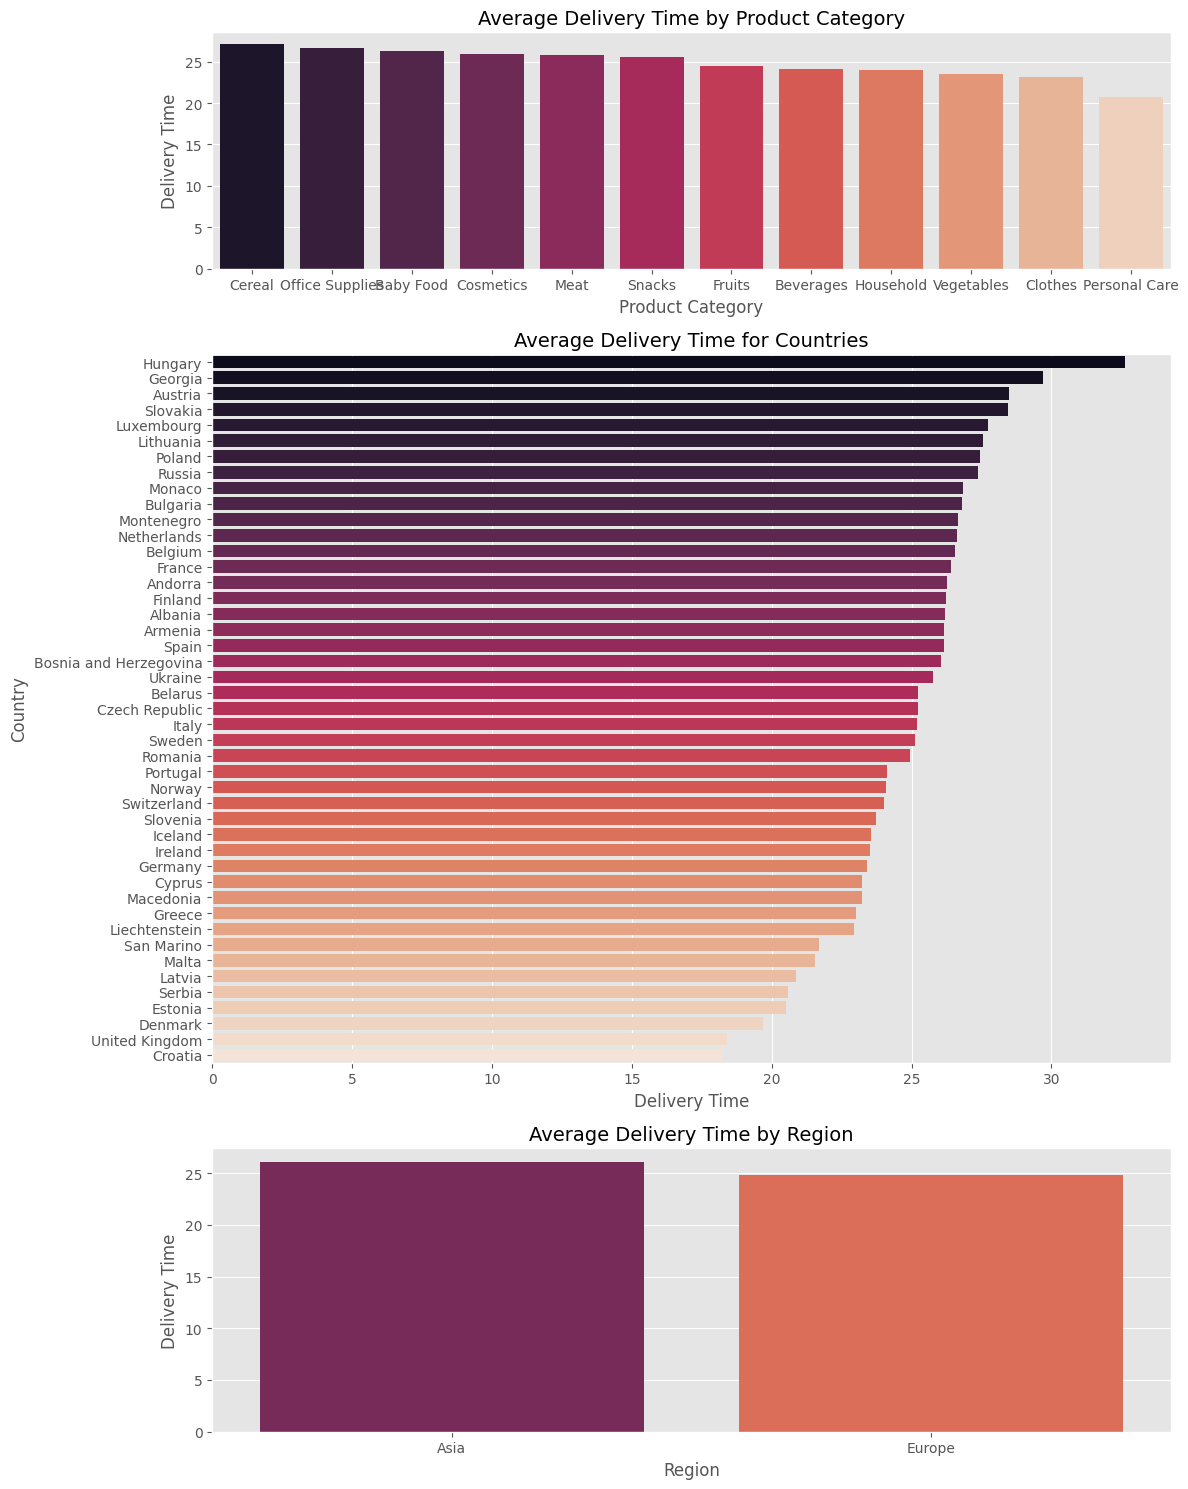

In [ ]:
# Сортування категорій в порядку спадіння за часом доставки
sort_category = df.groupby("Product Category")["Delivery Time"].mean().sort_values(ascending=False).index

# Сортування країн в порядку спадіння за часом доставки
sort_country = df.groupby("Country")["Delivery Time"].mean().sort_values(ascending=False).index

# Сортування регіонів в порядку спадіння за часом доставки
sort_region = df.groupby("Region")["Delivery Time"].mean().sort_values(ascending=False).index

# Налаштування розміру графіків
fig, axes = plt.subplots(3, 1, figsize=(12, 15),
                         gridspec_kw={'height_ratios': [1, 3, 1.2]})

# Візуалізація часу доставки товарів в розрізі категорій
sns.barplot(
    data=df,
    x="Product Category",
    y="Delivery Time",
    hue="Product Category",
    legend=False,
    estimator="mean",
    errorbar=None,
    ax=axes[0],
    order = sort_category,
    hue_order = sort_category,
    palette="rocket"
)
axes[0].set_title("Average Delivery Time by Product Category", fontsize=14)

# Візуалізація часу доставки товарів в розрізі країн

sns.barplot(
    data=df,
    y="Country",
    x="Delivery Time",
    hue="Country",
    legend=False,
    estimator="mean",
    errorbar=None,
    ax=axes[1],
    order = sort_country,
    hue_order = sort_country,
    palette="rocket"
)
axes[1].set_title("Average Delivery Time for Countries", fontsize=14)

# Візуалізація часу доставки товарів в розрізі регіонів

sns.barplot(
    data=df,
    x="Region",
    y="Delivery Time",
    hue="Region",
    legend=False,
    estimator="mean",
    errorbar=None,
    ax=axes[2],
    order = sort_region,
    hue_order = sort_region,
    palette="rocket"
    )
axes[2].set_title("Average Delivery Time by Region", fontsize=14)

plt.tight_layout()
plt.show()


####**Залежність прибутку від часу, необхідного на відвантаження товару**

**Відсутність кореляції:** точкова діаграма демонструє рівномірне розсіювання даних по всій площині графіка.

Це свідчить про те, що прямої **залежності між часом відвантаження та рівнем прибутку не існує**.


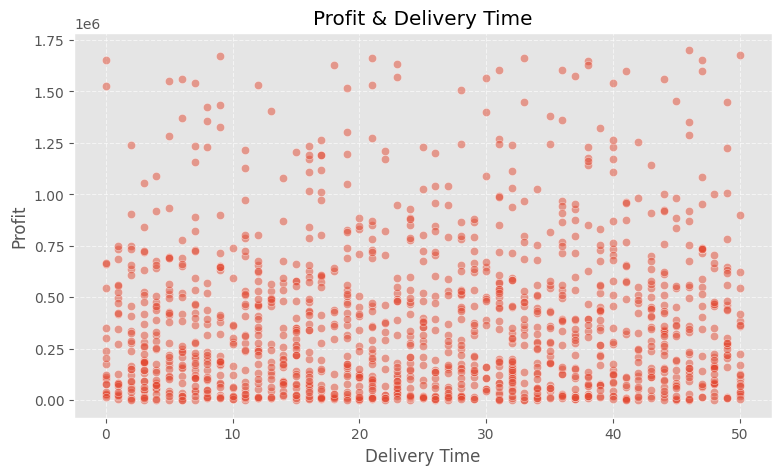

In [ ]:
# Налаштування розміру
plt.figure(figsize=(9, 5))

# Створення діаграми
sns.scatterplot(
    data=df,
    x="Delivery Time",
    y="Profit",
    alpha=0.5
)

# Підписи до діаграми
plt.title("Profit & Delivery Time")
plt.xlabel("Delivery Time")
plt.ylabel("Profit")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

####**Динаміка продажів у часі в розрізі категорій товарів, країн, регіонів**

**Динаміка за категоріями (Top-3):** категорія **Cosmetics** демонструє найбільш виражені піки прибутку, зокрема зафіксовано **абсолютний рекорд** у першій половині 2014 року (майже 7 млн прибутку за місяць).

Office Supplies та Household мають більш стабільну, хоча й волатильну динаміку, зазвичай коливаючись у межах 0.5–2.5 млн на місяць.

---

**Динаміка за країнами (Тор-5):** продажі в розрізі країн (Malta, Ukraine, San Marino, Hungary, Andorra) мають хаотичний характер без чітко вираженої спільної сезонності. Попит у цих країнах залежить від локальних факторів або великих разових контрактів, а не від глобальних трендів.

**Ukraine та Andorra демонстрували значні сплески активності у 2011 та 2013 роках відповідно.**

---

**Динаміка за регіонами:** **Europe є домінуючим регіоном** протягом усього періоду. Прибуток тут стабільно вищий і зазвичай знаходиться в діапазоні 4–8 млн на місяць, з піком у 2014 році (понад 10 млн).

**Asia демонструє значно скромніші результати**, стабільно утримуючи рівень прибутку нижче 2 млн на місяць протягом усіх років.

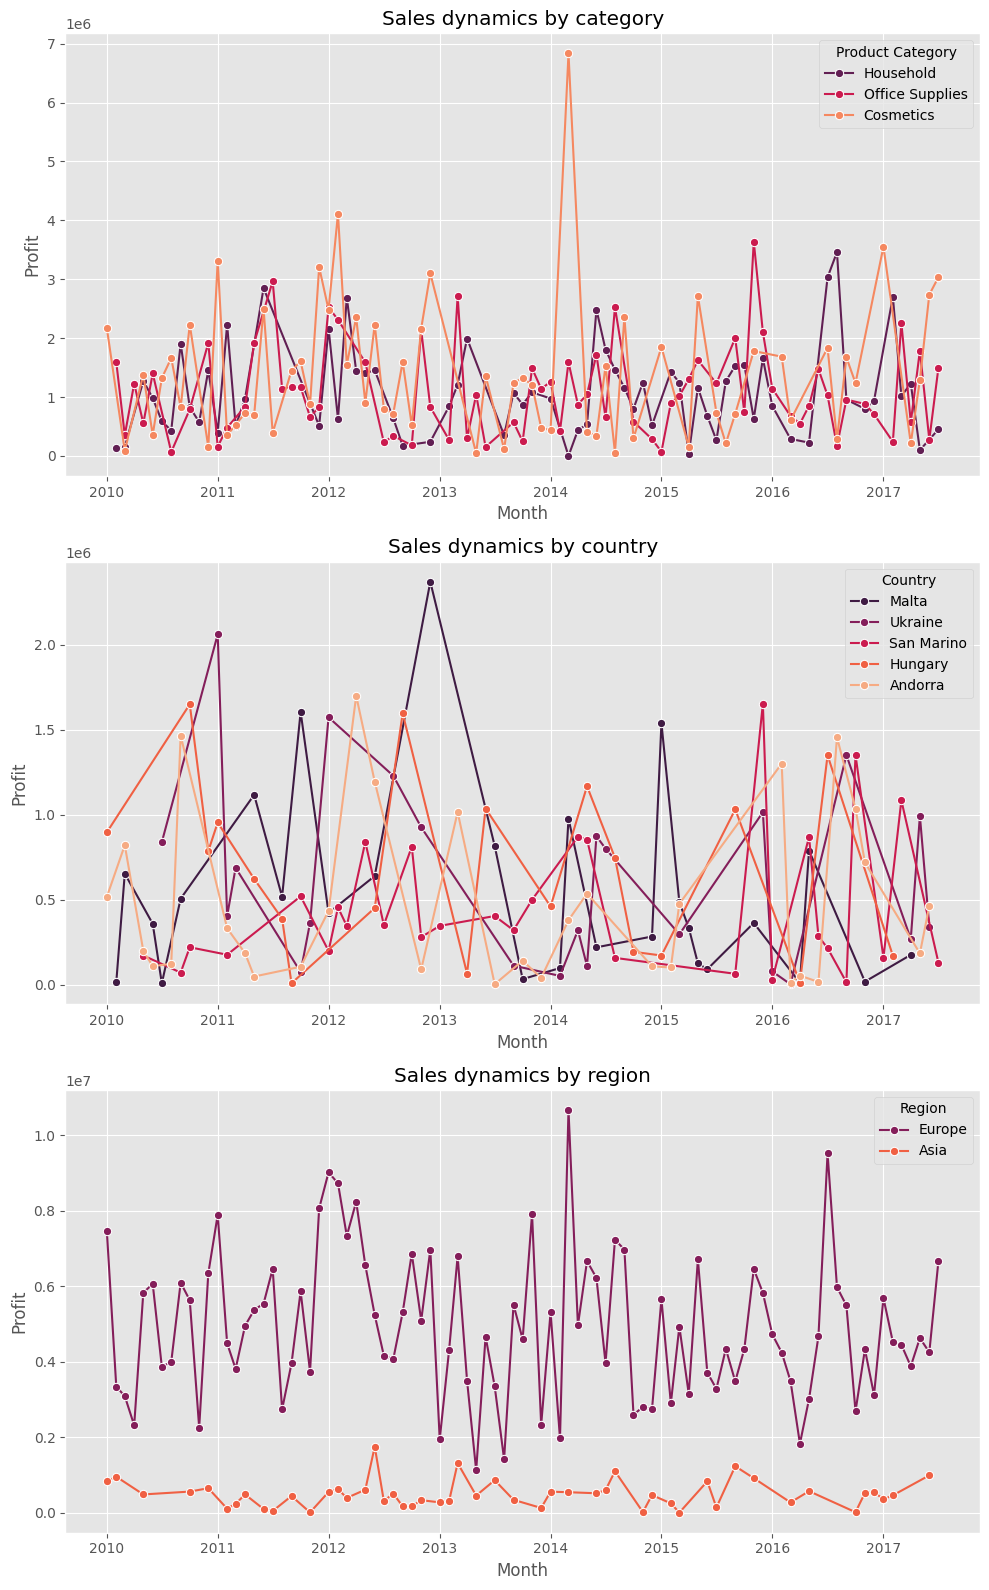

In [ ]:
# Змінення дати на перше число місяця
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

# Налаштування розміру
fig, axes = plt.subplots(3, 1, figsize=(10, 16))


# Обмеження кількості категорій
top_3_category = df.groupby("Product Category")["Profit"].sum().nlargest(3).index
df_top_ctg = df[df["Product Category"].isin(top_3_category)]

# Динаміка по категоріях
sns.lineplot(
    data=df_top_ctg,
    x="Month",
    y="Profit",
    hue="Product Category",
    estimator="sum",
    errorbar=None,
    marker="o",
    ax=axes[0],
    palette = "rocket"
)
axes[0].set_title("Sales dynamics by category")

# Обмеження кількості країн
top_5_country = df.groupby("Country")["Profit"].sum().nlargest(5).index
df_top_country = df[df["Country"].isin(top_5_country)]

# Динаміка по країнах
sns.lineplot(
    data=df_top_country,
    x="Month",
    y="Profit",
    hue="Country",
    estimator="sum",
    errorbar=None,
    marker="o",
    ax=axes[1],
    palette = "rocket"
)
axes[1].set_title("Sales dynamics by country")

sns.lineplot(
    data=df,
    x="Month",
    y="Profit",
    hue="Region",
    estimator="sum",
    errorbar=None,
    marker="o",
    ax=axes[2],
    palette = "rocket"
)
axes[2].set_title("Sales dynamics by region")

plt.tight_layout()
plt.show()

####**Аналіз продажів товарів за днями тижня**

**Найприбутковіший день — п'ятниця**.

Висока активність — **понеділок**.

Дні спаду — **найнижчі** показники прибутку спостерігаються **у четвер та вівторок**.

**Четвер є найменш прибутковим днем тижня.**

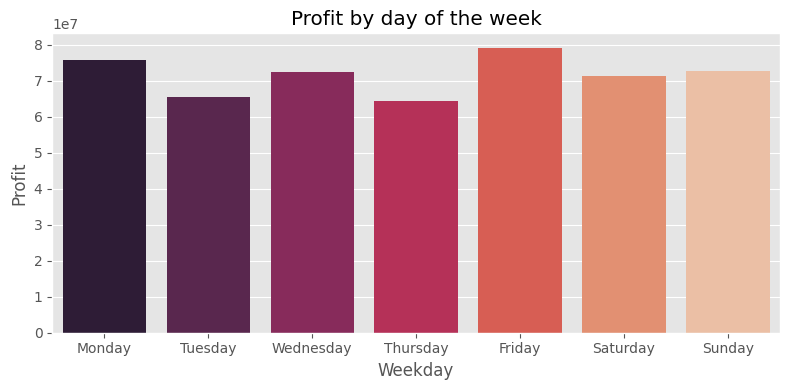

In [ ]:
# Формування днів тижня
df["Day Name"] = df["Order Date"].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Налаштування розміру
plt.figure(figsize=(8, 4))

# Формування графіка
sns.barplot(
    data=df,
    x="Day Name",
    y="Profit",
    hue="Day Name",
    order=days_order,
    hue_order=days_order,
    estimator="sum",
    errorbar=None,
    palette= "rocket",
    legend=False
)
# Присвоєння назв
plt.title("Profit by day of the week")
plt.xlabel("Weekday")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

#**Reporting**

####**Фінальні висновки**

У ході аналізу діяльності компанії було опрацьовано дані щодо замовлень за період 2010–2017 рр. Проєкт охопив етапи від глибокого очищення даних до побудови стратегічних інсайтів.

**1. Продуктова та фінансова ефективність**
**Драйвери прибутку:** категорія Cosmetics є найбільш маржинальною, попри менші обсяги продажів у порівнянні з Office Supplies. Остання категорія лідує за виручкою, але має надвисоку собівартість, що знижує її чисту ефективність.

**Географічні лідери:** найбільш прибутковими ринками з високою рентабельністю є Andorra, Ukraine та Malta.


---


**2. Логістика та канали продажів**
**Стабільність каналів:** продажі розподілені майже порівну між Online (49.5%) та Offline (50.5%), що свідчить про чудову диверсифікацію ризиків.

**Логістичний цикл:** середній час відвантаження складає 25 днів. Аналіз показав, що тривалість доставки не має прямої кореляції з прибутком, що дозволяє компанії фокусуватися на якості, а не лише на швидкості.


---


**3. Сезонність та динаміка**
**Регіональний акцент:** Europe залишається ключовим регіоном із найвищою стабільністю прибутку.

**Тижневі патерни:** найвищий прибуток компанія отримує у П'ятницю та Понеділок. Це вказує на змішану модель поведінки клієнтів (закриття тижневих планів та початок нових закупівель).

**Стратегічні рекомендації для бізнесу**
**Маркетинг:** збільшити інвестиції у просування категорії Cosmetics, оскільки вона приносить найбільший чистий прибуток на одиницю товару.

**Оптимізація витрат:** провести аудит логістичних витрат у країнах з високим Cost (Чехія, Боснія), щоб наблизити їхню маржинальність до показників Андорри.

**Операційне планування:** посилити роботу складських служб у П'ятницю, щоб забезпечити обробку пікових обсягів замовлень без затримок.